In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [6]:
print(cancer["DESCR"])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer["data"], cancer["target"])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(426, 30)
(143, 30)
(426,)
(143,)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(preds)
print(y_test)

[1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1
 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0]
[1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1
 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1
 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0]


In [16]:
clf.score(X_test, y_test)

0.9090909090909091

In [18]:
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, preds)
print(confusion_m)

[[53  8]
 [ 5 77]]


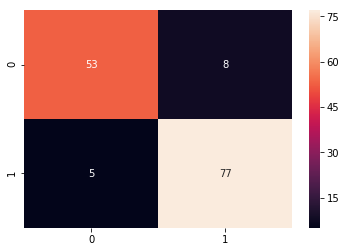

In [19]:
import seaborn as sns
sns.heatmap(confusion_m, annot=True)

In [21]:
from sklearn.metrics import classification_report
report = classification_report(y_test, preds, target_names=cancer["target_names"])
print(report)

             precision    recall  f1-score   support

  malignant       0.91      0.87      0.89        61
     benign       0.91      0.94      0.92        82

avg / total       0.91      0.91      0.91       143



In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
preds = logreg.predict(X_test)

In [26]:
print(logreg.score(X_train, y_train))
print(logreg.score(X_test, y_test))

0.9553990610328639
0.958041958041958


In [27]:
confusion_m = confusion_matrix(y_test, preds)
print(confusion_m)

[[57  4]
 [ 2 80]]


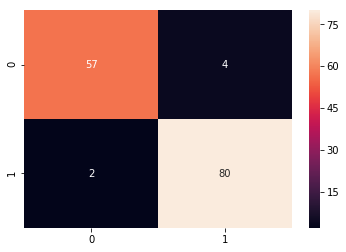

In [28]:
sns.heatmap(confusion_m, annot=True)


In [30]:
report = classification_report(y_test, preds, target_names=cancer["target_names"])
print(report)

             precision    recall  f1-score   support

  malignant       0.97      0.93      0.95        61
     benign       0.95      0.98      0.96        82

avg / total       0.96      0.96      0.96       143



In [33]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston['data']
y = boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 13)
(127, 13)
(379,)
(127,)


In [34]:
print(boston["DESCR"])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [39]:
from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)
print(reg.score(X_test, y_test))
print(reg.predict(X_test))

0.5123918703499843
[21.23333333 39.26666667 24.06666667 12.86666667 21.43333333 21.86666667
 21.46666667 27.8        33.23333333 14.16666667 12.         11.56666667
 16.66666667 10.16666667 40.9        28.46666667 23.2        26.03333333
 25.56666667 24.06666667 23.53333333 19.76666667 19.6        32.5
 20.96666667 12.33333333 16.73333333 22.06666667 21.5        16.96666667
 15.9        20.7        18.33333333 23.36666667 22.83333333 23.1
 10.16666667 23.1        13.13333333 16.83333333 25.96666667 20.96666667
 19.8        15.26666667 21.1        24.5        23.53333333 22.96666667
 14.53333333 20.86666667 14.16666667 21.86666667 32.46666667 26.73333333
 22.06666667 22.8        22.96666667 19.8         9.3        20.26666667
 32.5        21.86666667 26.73333333 31.33333333 21.46666667 35.13333333
 15.26666667 19.83333333 14.5        25.96666667 29.66666667 21.86666667
 26.63333333 27.6        23.6        10.26666667 34.96666667 23.56666667
 27.96666667 18.         23.36666667 18.433333

In [40]:
print(reg.coef_)

AttributeError: 'KNeighborsRegressor' object has no attribute 'coef_'

In [42]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_test, y_test))
print(reg.predict(X_test))

0.6353620786674665
[24.95242095 23.62103603 29.21341544 11.97586964 21.33688522 19.47270023
 20.42304705 21.52151744 18.99420776 19.91486748  4.93479475 16.05522458
 16.91865924  5.34748135 39.8532679  32.33300268 22.33140869 36.54399797
 31.03481174 23.32519523 24.92272042 24.26965237 20.71353663 30.45335016
 22.45699529  9.87018454 17.70327024 17.96092462 35.69651424 20.79470104
 18.10460338 17.6798399  19.71471124 23.80071994 29.06967938 19.22845092
 10.9827218  24.56507125 17.29284531 15.18639065 26.10224841 20.87956585
 22.26213357 15.32658621 22.85990998 25.0946293  19.74938589 22.69795393
  9.66269908 24.46020219 20.69146192 17.51925862 24.45743226 30.094858
 13.30018094 21.51999888 20.66106358 15.34165143 13.77778277 22.07762378
 17.53500273 21.60779414 32.91070817 31.32857473 17.65125782 32.70348085
 18.55078395 19.31741597 18.78727742 23.04648674 22.82036456 24.00303326
 30.63350586 28.86342332 25.78494589  5.01083121 36.82552503 23.8068372
 27.37235786 19.33065964 28.5157878

In [44]:
reg.coef_

array([-1.16869578e-01,  4.39939421e-02, -5.34808462e-03,  2.39455391e+00,
       -1.56298371e+01,  3.76145473e+00, -6.95007160e-03, -1.43520477e+00,
        2.39755946e-01, -1.12937318e-02, -9.86626289e-01,  8.55687565e-03,
       -5.00029440e-01])

In [45]:
df = pd.DataFrame(reg.coef_, index=boston["feature_names"])
df

,0
CRIM,-0.116870
ZN,0.043994
INDUS,-0.005348
CHAS,2.394554
NOX,-15.629837
RM,3.761455
AGE,-0.006950
DIS,-1.435205
RAD,0.239756
TAX,-0.011294


In [46]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
preds = lasso.predict(X_test)

In [50]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
reg.coef_

0.7150561596565886
0.5515110936187517


array([-1.16869578e-01,  4.39939421e-02, -5.34808462e-03,  2.39455391e+00,
       -1.56298371e+01,  3.76145473e+00, -6.95007160e-03, -1.43520477e+00,
        2.39755946e-01, -1.12937318e-02, -9.86626289e-01,  8.55687565e-03,
       -5.00029440e-01])

In [48]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
preds = ridge.predict(X_test)

In [51]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
reg.coef_

0.7678509855379487
0.6265116223767434


array([-1.16869578e-01,  4.39939421e-02, -5.34808462e-03,  2.39455391e+00,
       -1.56298371e+01,  3.76145473e+00, -6.95007160e-03, -1.43520477e+00,
        2.39755946e-01, -1.12937318e-02, -9.86626289e-01,  8.55687565e-03,
       -5.00029440e-01])

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [63]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=6)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [64]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.9527542624211662
0.6819680280165834


In [65]:
print(tree.feature_importances_)

[0.04867129 0.         0.00801891 0.         0.01653855 0.24589435
 0.0048476  0.02657656 0.00136845 0.00226579 0.02686614 0.00468668
 0.6142657 ]


In [72]:
df_tree = pd.DataFrame({'importsances':tree.feature_importances_},index=boston['feature_names'])
df

,0
CRIM,-0.116870
ZN,0.043994
INDUS,-0.005348
CHAS,2.394554
NOX,-15.629837
RM,3.761455
AGE,-0.006950
DIS,-1.435205
RAD,0.239756
TAX,-0.011294


In [71]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 7, random_state = 2)
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=1,
           oob_score=False, random_state=2, verbose=0, warm_start=False)

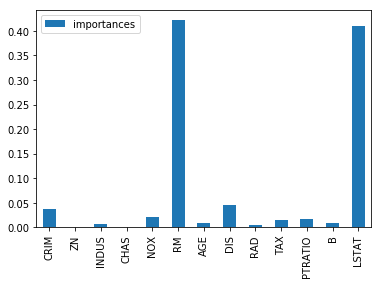

In [75]:
df_forest = pd.DataFrame({'importances':forest.feature_importances_}, index=boston['feature_names'])
df_forest.plot.bar()

In [76]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

0.9713163295541406
0.7811980104911793


In [77]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(solver='lbfgs', random_state=0, max_iter=1000)

In [79]:
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.8512371973751539
0.67224365785417


In [81]:
dat = pd.DataFrame(boston['data'], columns=boston['feature_names'])
dat.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [82]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [84]:
mlp.fit(X_train_scaled, y_train)
print(old) #Accuracy score of MLP using unscaled data
print(mlp.score(X_test_scaled, y_test))

0.6791001782013986


In [90]:
#One hot encoding

d = {'institution':['MPI','LMU','TUM'], 'number':[5,34,54]}
df = pd.DataFrame(d, index=['a','b', 'c'])
df

,institution,number
a,MPI,5
b,LMU,34
c,TUM,54


In [91]:
dummies = pd.get_dummies(df['institution'])

In [92]:
dummies

,LMU,MPI,TUM
a,0,1,0
b,1,0,0
c,0,0,1


In [98]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree =10, include_bias=False)

In [141]:
values = df['number'].values.reshape(-1,1)
values

array([[ 5],
       [34],
       [54]])

In [142]:
dim(values)

NameError: name 'dim' is not defined

In [102]:
print(poly.fit_transform(values))
print(poly.get_feature_names())

[[5.00000000e+00 2.50000000e+01 1.25000000e+02 6.25000000e+02
  3.12500000e+03 1.56250000e+04 7.81250000e+04 3.90625000e+05
  1.95312500e+06 9.76562500e+06]
 [3.40000000e+01 1.15600000e+03 3.93040000e+04 1.33633600e+06
  4.54354240e+07 1.54480442e+09 5.25233501e+10 1.78579390e+12
  6.07169928e+13 2.06437775e+15]
 [5.40000000e+01 2.91600000e+03 1.57464000e+05 8.50305600e+06
  4.59165024e+08 2.47949113e+10 1.33892521e+12 7.23019613e+13
  3.90430591e+15 2.10832519e+17]]
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


In [103]:
#Gridsearch
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor


In [106]:
param_grid = {'hidden_layer_sizes':[(200,),(100,)],"alpha":[0.00001,0.0001,0.001]}
grid_search = GridSearchCV(MLPRegressor(max_iter=10000,solver="lbfgs"),param_grid, cv=2, return_train_score=True)

In [108]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=10000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'hidden_layer_sizes': [(200,), (100,)], 'alpha': [1e-05, 0.0001, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [109]:
dir(grid_search)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_check_is_fitted',
 '_estimator_type',
 '_get_param_iterator',
 '_get_param_names',
 'best_estimator_',
 'best_index_',
 'best_params_',
 'best_score_',
 'classes_',
 'cv',
 'cv_results_',
 'decision_function',
 'error_score',
 'estimator',
 'fit',
 'fit_params',
 'get_params',
 'grid_scores_',
 'iid',
 'inverse_transform',
 'multimetric_',
 'n_jobs',
 'n_splits_',
 'param_grid',
 'pre_dispatch',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'refit',
 'return_train_scor

In [111]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.0001, 'hidden_layer_sizes': (200,)}
0.8159678597149698


In [117]:
results = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,3.258898,0.491597,0.000538,0.000015,1e-05,"(200,)","{'alpha': 1e-05, 'hidden_layer_sizes': (200,)}",0.648959,0.732772,0.690755,0.041906,6,0.957104,0.967357,0.962231,0.005127
1,1.202930,0.576417,0.000371,0.000006,1e-05,"(100,)","{'alpha': 1e-05, 'hidden_layer_sizes': (100,)}",0.673972,0.751458,0.712613,0.038743,5,0.970850,0.880605,0.925727,0.045123
2,7.651392,0.510394,0.000492,0.000002,0.0001,"(200,)","{'alpha': 0.0001, 'hidden_layer_sizes': (200,)}",0.801928,0.830082,0.815968,0.014076,1,0.988488,0.984311,0.986399,0.002088
3,1.369333,0.165028,0.000357,0.000004,0.0001,"(100,)","{'alpha': 0.0001, 'hidden_layer_sizes': (100,)}",0.775543,0.811942,0.793694,0.018200,2,0.945002,0.954028,0.949515,0.004513
4,2.340641,0.778862,0.000499,0.000005,0.001,"(200,)","{'alpha': 0.001, 'hidden_layer_sizes': (200,)}",0.753186,0.818929,0.785970,0.032871,3,0.940401,0.957187,0.948794,0.008393
5,2.371089,0.558198,0.000378,0.000008,0.001,"(100,)","{'alpha': 0.001, 'hidden_layer_sizes': (100,)}",0.714997,0.808556,0.761653,0.046780,4,0.977353,0.956687,0.967020,0.010333


In [118]:
from numpy import array
scores = array(results['mean_test_score']).reshape(3, 2)
scores

array([[0.69075471, 0.7126127 ],
       [0.81596786, 0.7936945 ],
       [0.78597048, 0.76165323]])

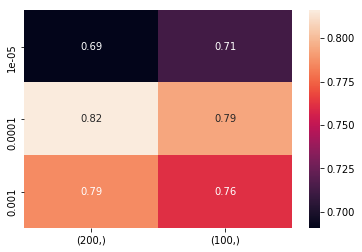

In [121]:
import seaborn as sns
sns.heatmap(scores, annot=True, xticklabels=param_grid["hidden_layer_sizes"], yticklabels=param_grid["alpha"])

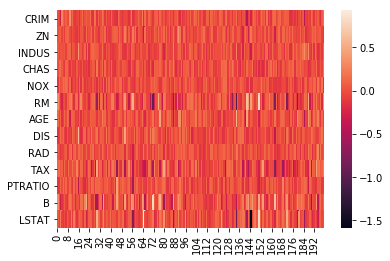

In [125]:
best = grid_search.best_estimator_
sns.heatmap(best.coefs_[0], yticklabels=boston['feature_names'])

In [126]:
#Pipeline
from sklearn.pipeline import Pipeline

In [138]:
pipe = Pipeline([("scaler",StandardScaler()),
                ("nn",MLPRegressor(max_iter=10000,solver="lbfgs"))])
param_grid = {'nn__hidden_layer_sizes':[(200,),(100,)],
              "nn__alpha":[0.00001,0.0001,0.001]}

In [139]:
grid = GridSearchCV(pipe, param_grid, cv=2, return_train_score = True)
grid.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('nn', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_...True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'nn__hidden_layer_sizes': [(200,), (100,)], 'nn__alpha': [1e-05, 0.0001, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [ ]:
import pandas as pd
df = pd.DataFrame(cancer["data"], columns = cancer["feature_names"])
df["y"]= cancer["target"]
df.head()